# 목차

본격적으로 Prompt Engineering 실습 들어가기 전에 그것보다도 훨씬 더 중요한 프레임워크 소개

- 일단 Prompt Engineering 기법들 이것저것 했을 때, 많은 시간을 투입해도 별다른 결과가 없을 수 있음
- 특히 이게 더 좋은 Prompt인가 판단하기도 어려울 수 있음
- Prompt Engineering은 AI 모델 학습과 다르게 성능 변화가 좀 더 Discrete한 영역 일 수 있음

태스크에 맞춰서 명확한 평가 기준치와 기준치를 확인 할 수 있는 샘플 데이터가 필요!

## Prompt Development Cycle

Prompt Engineering 프로세스를 테스트 기반 방법론으로 체계화하여 최상의 성능 달성하는 방법론

- 테스트 케이스와 평가 기준 - 매우 중요!
- 평가 기준 설정
- 태스크마다 다름
  - 정답이 있는 경우(Supervised)와 없는 경우
  - ROUGE
  - LLM-as-a-judge
  - Blind Testing
  - ELO Rating
- Baseline Prompt 생성
- 테스트 및 고도화

= AI 모델 학습을 통한 고도화와 비슷함

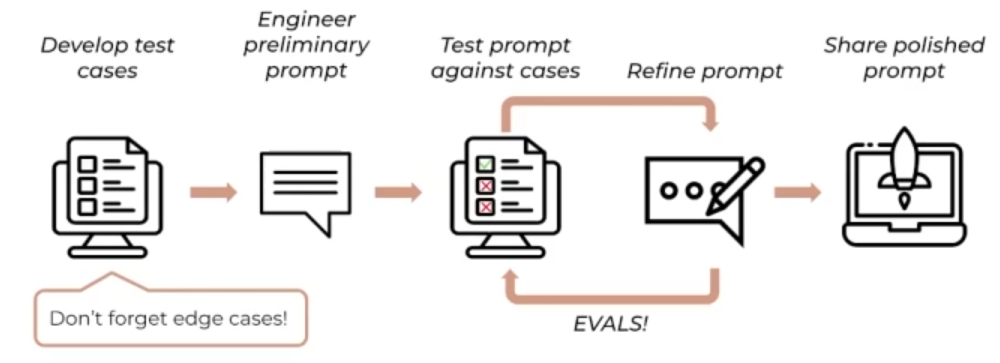

Prompt Development Cycle은 아래 6단계로 나눠서 볼 수 있음

1. 명확한 평가 기준 설정
2. 평가를 진행 할 테스트 케이스 선정 (엣지 케이스 포함 - ex. 입력 텍스트가 너무 길거나, 특정 정보가 빠져있거나 ..)
3. Baseline Prompt 선정(Simple)
  - 고도화 과정 후에 비교를 위한 대조군 설정
4. (반복) 테스트 케이스에 대해 평가 진행
5. (반복) Prompt 수정
6. Prompt 완성
  - Baseline 대비 어떤 지표에서 얼마나 개선되었는지

### 1. 명확한 평가 기준 설정

1-1. 태스크 정의
- 요약, Q&A, 코드 생성, 글쓰기 등등
- 각 태스크 별로 사용되는 평가 기준 및 지표들이 다를 수 있음
  - 동일한 요약 안에서도 대화 요약, 문서 요약 등이 존재
  - Q&A도 In-Domain(도메인 내의 지식만을 요구), Out-of-Domain(도메인 외의 지식도 요구, ex. ChatGPT ..)으로 나뉠 수도 있음
- 어떤 문제를 풀어야하는지 태스크를 구체적으로 명확하게 정의하는 것이 첫 단계!

1-2. 평가 기준 설정
1. 성능
  - 태스크에서 정확히 어느 정도의 품질이 필요한 지를 정의하는 객관적인 기준
  - 태스크마다 평가 기준 다를 수 있고 여러 개의 평가 지표들이 있을 수 있음
    - 예시1. 객관식 질문에 대답하는 태스크
      - 정확도(Accuracy)
    - 예시2. 요약 태스크
      - 정답과 모델 출력값 간의 문자열 비교 (Exact Match or Partial Match)
2. 응답 속도 (Latency)
  - LLM에서 Latency 정의: Prompt 입력 후 응답 완료까지 걸리는 시간 (주요 용어)
  - 응답 시간. 실시간 및 비실시간 여부에 따라 기준치가 높아지거나 낮아질 수 있음
3. 비용
  - 모델 가격, 사용되는 평균 입력 및 출력 토큰 수, 호출 수 등을 고려한 예상 비용

우선순위는 서비스마다 다를 수 있는데, 아무래도 품질이 불충분하면 서비스 가능성이 없기 때문에 위 순서대로 우선순위를 보시는 것도 좋은 시작점

이번 Prompt Engineering 파트에서는 성능 기반 평가 기준 위주로 보고, 응답 속도와 비용은 프로젝트들 진행하면서 설명 예정

### 2. 평가를 진행할 테스트 케이스 선정

#### 2-1. 테스트 케이스 확보
- 예시 시나리오: 숙소 리뷰 요약

- 사람이 직접 제작한 N개 정도의 Golden Reference(약 100개?)  

  **Golden Reference 예제**  
  리뷰 내용: “위치가 정말 좋아요! 지하철 역이랑 가깝고, 주변에 맛집도 많아서 불편함이 없었어요. 방도 깔끔했고, 침대가 편안했어요.”

  요약 예시 (Golden Reference): “위치가 좋고 주변 편의시설이 잘 갖춰져 있으며 방이 깔끔하고 편안함.”
  리뷰 내용: “숙소는 깨끗한 편이었지만 직원이 불친절했어요. 재방문 의사는 없어요.”

  요약 예시 (Golden Reference): “숙소는 깨끗했으나 직원의 친절도가 부족함.”


- 비용 이슈로 ChatGPT 3.5를 써야한다고 했을 때 더 상위 레벨의 모델 출력 값 (ex. GPT-4)

  **GPT-4 생성 예제**  
  리뷰 내용: "숙소는 시끄러운 위치에 있어서 잠을 잘 못 잤어요. 방도 생각보다 좁았고, 청소 상태가 별로였어요."

  GPT-4 생성 요약: “숙소가 시끄럽고 청결 및 공간에 문제가 있음.”
  리뷰 내용: "친구들과 좋은 추억을 쌓기 좋은 곳이에요! 스태프들도 친절하고 침대도 편안해서 잘 쉬다 갔습니다."

  GPT-4 생성 요약: “친절한 스태프와 편안한 침대 덕분에 좋은 경험을 함.”

- 이미 시중에 존재하는 레이블링 된 데이터 등등

2-2. 엣지 케이스
- 예시 1
  - 입력이 매우 길거나 매우 짧은 케이스들  
  - 매우 긴 리뷰:  
  리뷰 내용: (500자 이상의 상세 리뷰)  
  요약 기대치: 긴 리뷰에서도 중복된 내용 없이 핵심만 요약될 것

  - 매우 짧은 리뷰:  
  리뷰 내용: “좋아요!”  
  요약 기대치: 요약 시 의미 없는 단어는 제외될 것 (ex. “좋았음”)

- 예시 2
 - 토막글이나 실제 숙소에 대한 정보가 별로 없는 리뷰 등의 저품질 리뷰들로만 이루어진 케이스들
 - 리뷰 내용: “여기 좀 별로예요.”  
  요약 기대치: 내용이 부족해 요약 결과가 유의미하지 않게 나올 가능성 (ex. "상세 정보 부족")
- 예시 3
  - 입력으로 숙소 리뷰가 N개 이하 들어왔을 때는 요약 결과가 아닌 충분하지 않은 케이스
    - 리뷰 내용: 리뷰가 2개 이하일 때  
      요약 기대치: "정보 부족으로 요약 불가능"
    - 이런 케이스는 후처리 또는 전처리로 해결하는게 나을 수도 있음

### 3. Baseline Prompt 선정
- 고도화 과정을 확인하기 위한 용도의 Baseline Prompt 선정
- 정말 단순하고 Naive 한 Prompt
  - 특별히 노력을 거치치 않은 Prompt
  - Prompt Library 중에 하나로 선정

### 이후 고도화 과정
4. (반복) 테스트 케이스에 대해 평가 진행
5. (반복) Prompt 수정
6. Prompt 완성
  - 최종 Prompt 공유
  - Baseline Prompt와 Baseline 대비 어떤 지표에서 얼마나 개선되었는지도 공유

### 정리
- 최상급 품질의 Prompt 제작에는 명확하게 태스크와 평가 기준을 설정하고 진행하는게 중요